<a href="https://colab.research.google.com/github/PRANAVIKONDA/496activities/blob/main/PranaviKonda_ASG11_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import tensorflow_probability as tfp
tfd = tfp.distributions

tasksDF=pd.read_csv('/content/drive/MyDrive/PERT-CPM.csv')
taskNames=tasksDF['tasks']

simulationDF=pd.DataFrame(columns=taskNames)

print(simulationDF.columns)
for index, task in tasksDF.iterrows():
  dist=tfd.PERT(low=task['best'], peak=task['mostL'], high=task['worst'], temperature=4)
  simulationDF[task['tasks']]=dist.sample(10000)

print(simulationDF.head(2))

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'EOP'], dtype='object', name='tasks')
tasks         A         B         C         D         E         F         G  \
0      6.967435  4.974239  3.259119  2.245056  6.371313  4.318033  6.030300   
1      7.895321  4.551144  2.804463  2.793953  6.052946  2.836312  6.953176   

tasks         H          I         J  EOP  
0      3.525367  12.278948  1.952855  NaN  
1      7.811489  15.691045  2.696215  NaN  


In [33]:
paths=['ADEJ','BCDEJ','BCFGJ','BCFHJ','BI']
pathsDF=pd.DataFrame(columns=paths)

ADEJ=[]
BCDEJ=[]
BCFGJ=[]
BCFHJ=[]
BI=[]
for index, row in simulationDF.iterrows():
  ADEJ.append(row['A']+row['D']+row['E']+row['J'])
  BCDEJ.append(row['B']+row['C']+row['D']+row['E']+row['J'])
  BCFGJ.append(row['B']+row['C']+row['F']+row['G']+row['J'])
  BCFHJ.append(row['B']+row['C']+row['F']+row['H']+row['J'])
  BI.append(row['B']+row['I'])

pathsDF['ADEJ']=ADEJ
pathsDF['BCDEJ']=BCDEJ
pathsDF['BCFGJ']=BCFGJ
pathsDF['BCFHJ']=BCFHJ
pathsDF['BI']=BI
print(pathsDF.head(3))

        ADEJ      BCDEJ      BCFGJ      BCFHJ         BI
0  17.536659  18.802582  20.534546  18.029613  17.253187
1  19.438435  18.898720  19.841311  20.699623  20.242188
2  17.739811  20.086483  20.560093  16.065271  16.335636


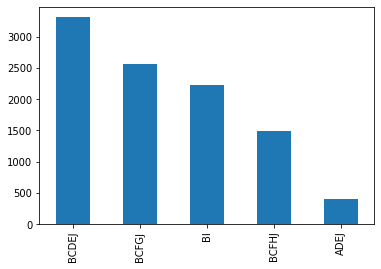

In [35]:
pathsDF['Critical Path'].value_counts().plot.bar()